In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
data=pd.read_csv('bank-additional.csv',sep=';')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [5]:
data['y']=data['y'].str.lower().replace({'yes':1,'no':0})

In [6]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


In [8]:
import pandas_profiling
profile_report=pandas_profiling.ProfileReport(data)
profile_report.to_file("Profile_Report_BankMarketing.html")

In [9]:
numeric_var_names=[key for key in dict(data.dtypes)
                   if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes)
                   if dict(data.dtypes)[key] in ['object']]

In [10]:
print(numeric_var_names)
print(cat_var_names)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [11]:
# Checking the missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

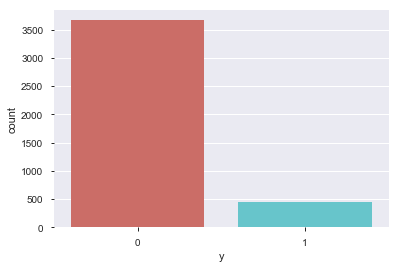

In [12]:
#dependent variable distribution (response vs. non response)
%matplotlib inline
sns.countplot(x='y',data=data, palette='hls')
plt.show()

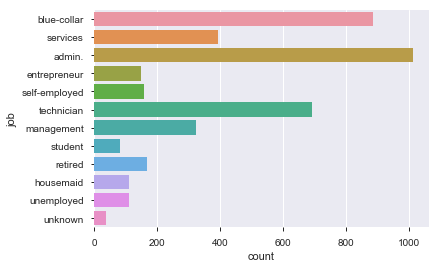

In [13]:
#Customer Job Distribution
sns.countplot(y="job", data=data)
plt.show()

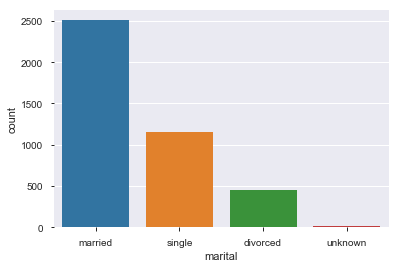

In [14]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

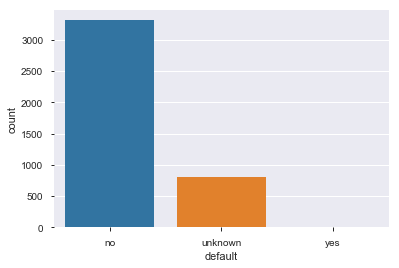

In [15]:
# Distribution of Default
sns.countplot(x="default", data=data)
plt.show()

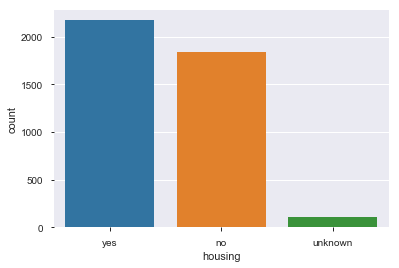

In [16]:
#house loan Distribution
sns.countplot(x="housing", data=data)
plt.show()

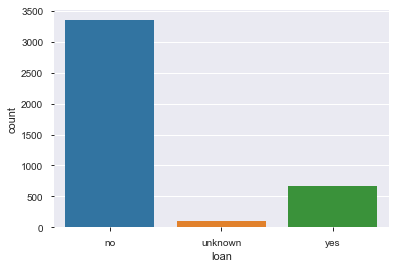

In [17]:
#personal Loan
sns.countplot(x="loan", data=data)
plt.show()

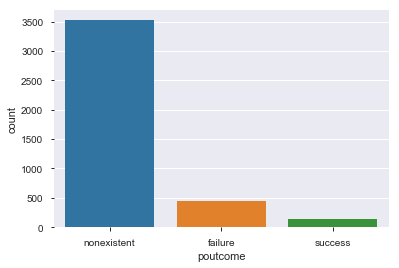

In [18]:
# Previous Marketing campaign response
sns.countplot(x="poutcome", data=data)
plt.show()

In [19]:
data.groupby('y').mean().T

y,0,1
age,39.895311,41.889135
duration,219.409760,560.787140
campaign,2.605780,1.980044
pdays,982.763086,778.722838
previous,0.141767,0.585366
emp.var.rate,0.240185,-1.177384
cons.price.idx,93.599677,93.417268
cons.conf.idx,-40.586723,-39.786475
euribor3m,3.802826,2.145448
nr.employed,5175.502072,5093.118625


In [20]:
# Observations:
#The average age of customers who bought the term deposit is higher than that of the customers who didn’t.
#The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
#Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [21]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885,0.131423
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611,0.069005
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000,0.054054
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,0.100000
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914,0.092593
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048,0.228916
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843,0.081761
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870,0.089059
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341,0.231707


In [22]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964,0.096413
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472,0.100438
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114,0.134432
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091,0.090909


In [23]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic.4y,47.657343,255.682984,2.421911,973.524476,0.142191,0.291841,93.666193,-40.465501,3.828089,5174.093939,0.088578
basic.6y,40.144737,259.000000,2.649123,985.881579,0.140351,0.271053,93.689114,-41.539912,3.810469,5176.600000,0.074561
basic.9y,39.231707,250.538328,2.348432,979.963415,0.158537,0.183275,93.640805,-41.443554,3.722737,5173.182578,0.074913
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


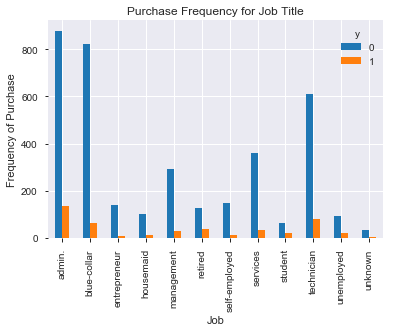

In [24]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

In [25]:
#The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

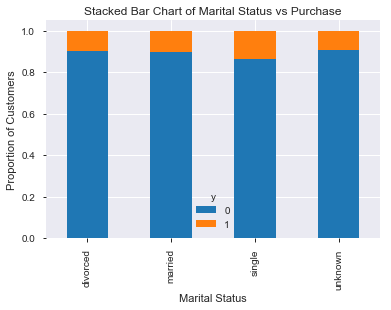

In [26]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

In [27]:
#The marital status does not seem a strong predictor for the outcome variable.

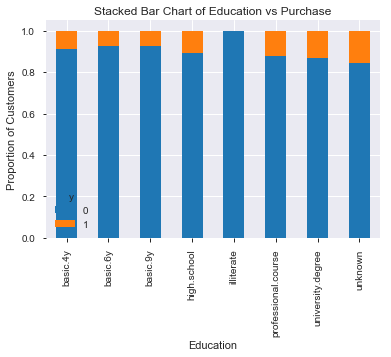

In [28]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [29]:
# Education seems a good predictor of the outcome variable.

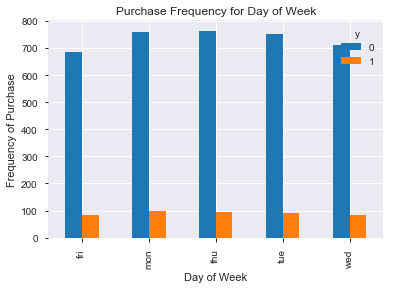

In [30]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [31]:
#Day of week may not be a good predictor of the outcome.

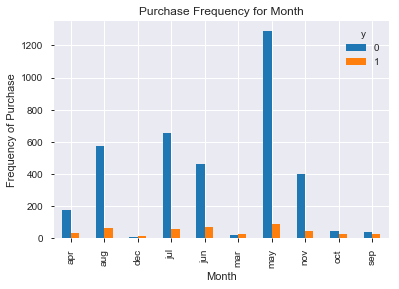

In [32]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [33]:
#Month might be a good predictor of the outcome variable.

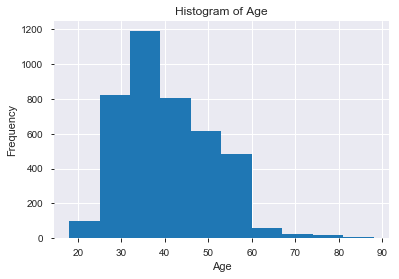

In [34]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [35]:
# Most of the customers of the bank in this dataset are in the age range of 30–40.

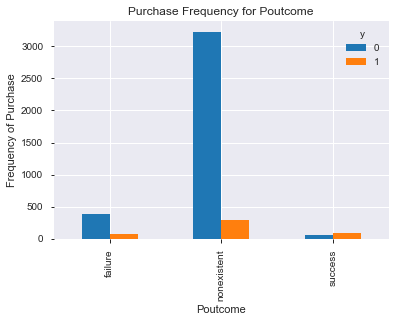

In [36]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [37]:
#Poutcome seems to be a good predictor of the outcome variable.

In [38]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df

In [39]:
for i in cat_var_names:
    data=create_dummies(data,i)

In [40]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,0,1,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,1,0,0,0,1,0


In [41]:
y=['y']
X=[i for i in data.columns.difference(['y'])]

In [ ]:
#import warnings
#warnings.filterwarnings('ignore')

### Recursive Feature Elimination

In [42]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
rfe=RFE(logreg,18)
rfe=rfe.fit(data[X],data[y])
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False False False False False
 False False False False False False  True False  True False False  True
  True False  True  True  True False False False  True False  True False
 False False False False  True  True  True  True  True False False False
 False False  True  True  True]
[25  8 12 15  1 20 16 23 22 17 36 24 21 14 13 34  2  3  1  6  1  4 27  1
  1 31  1  1  1 26 28 18  1 33  1  5 10  9 35 11  1  1  1  1  1  7 29 30
 19 32  1  1  1]


In [43]:
dic={'Columns':list(data[X].columns),'use':list(rfe.support_)}
df=pd.DataFrame(dic)
df[df.use==True]

,Columns,use
4,contact_telephone,True
18,education_unknown,True
20,euribor3m,True
23,job_blue-collar,True
24,job_entrepreneur,True
26,job_management,True
27,job_retired,True
28,job_self-employed,True
32,job_unemployed,True
34,loan_unknown,True


In [44]:
X=data[X]
y=data[y]

In [45]:
#Building Logistic Regression Model
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg=LogisticRegression()
logreg.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
y_Pred=logreg.predict(test_X)
y_Pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [47]:
print("Accuracy of LogisticRegression on the dataset is : {:.2f}".format(logreg.score(test_X,test_y)))

Accuracy of LogisticRegression on the dataset is : 0.91


In [48]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,y_Pred)
print(cm)

[[1072   42]
 [  75   47]]


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_Pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1114
           1       0.53      0.39      0.45       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.73      0.67      0.70      1236
weighted avg       0.89      0.91      0.90      1236



In [50]:
logreg.predict_proba(test_X)[:,1]

array([0.00940408, 0.15352914, 0.0577501 , ..., 0.34724554, 0.0157031 ,
       0.57525241])

## Naive Bayes

In [51]:
import sklearn.naive_bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [53]:
nb_clf=GaussianNB()
nb_clf.fit(train_X,train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
nb_clf.predict(test_X)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [55]:
nb_cm=metrics.confusion_matrix(test_y,nb_clf.predict(test_X))

In [56]:
nb_cm

array([[978, 136],
       [ 55,  67]], dtype=int64)

Text(0.5, 12.5, 'Predicted Label')

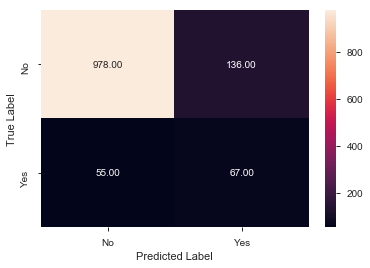

In [57]:
sns.heatmap(nb_cm,annot=True,fmt='.2f',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [58]:
metrics.accuracy_score(test_y,nb_clf.predict(test_X))

0.8454692556634305

In [ ]:
#NAive Bayes is usually worse than LogisticRegression/Any other model:
#-Naive Assumption that variables are independent of each other(No multicollinearity)
#-There is no mechanism to subset the variables by using the model

## K Nearest Neighbors (KNN)

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [60]:
train_X.shape

(2883, 53)

In [61]:
tuned_parameters=[{'n_neighbors':list(range(5,20,2))}]    #value of k varies between 5 to sqrt(number of obs)
knn_clf=GridSearchCV(KNeighborsClassifier(),tuned_parameters,cv=5,scoring='accuracy')

In [62]:
knn_clf.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
knn_clf.best_score_

0.9150190773499827

In [64]:
knn_clf.best_params_

{'n_neighbors': 13}

In [65]:
knn_clf=KNeighborsClassifier(n_neighbors=13)

In [66]:
knn_clf.fit(train_X,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [67]:
knn_clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [68]:
metrics.accuracy_score(test_y,knn_clf.predict(test_X))

0.8907766990291263

Text(0.5, 12.5, 'Predicted label')

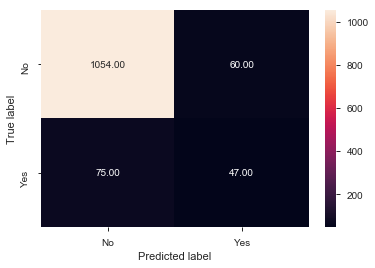

In [69]:
knn_cm = metrics.confusion_matrix(test_y,knn_clf.predict(test_X))
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [70]:
#KNN is a good model.It is used a lot in recommendations

In [71]:
# %time when used before a command it tells the time it takes for execution